<a href="https://colab.research.google.com/github/linhoangce/ml_with_pytorch_and_scikitlearn/blob/main/chapter9_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topics covered:

* Exploring and visualizing datasets
* Looking at different approaches to implementing linear regression models
* Training regression models that are robust to outliers
* Evaluating regression models and diagnosing common problems
* Fitting regression models to nonlinear data

# Introducing linear regression

## Simple linear regression

$ y = w_1x + b $

## Multiple linear regression

$ y = w_1x_1 + \dots + w_mx_m + b = \sum_{i=1}^m{w_ix_i + b} = w^Tx + b $




# Exploring the Ames Housing dataset

This datasets cntains information about individual residential property in Ames, Iowa, from 2006 to 2010.

## Loading the Ames Housing dataset into a DataFrame

Consists of 2,930 examples and 80 features. For simplicity, we will only work with a subset of the features:

* `Overall Qual`: Rating for the overall material and finish of the house on a scale from 1 (very poor) to 10 (excellent)
* `Overall Cond`: Rating for the overall condition of the house on a scale from 1 (very poor) to 10 (excellent)
* `Gr Liv Area`: Above grade (ground) living area in square feet
* `Total bsmt SF`: Total square feet of the basement area
* `Central Air`: Centeral air conditioning (N=no, Y=yes)
* `SalePrice`: Sale price in U.S dollars

SalePrice is target label.

In [ ]:
# load data
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep='\t',
                 usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [ ]:
df.shape

(2930, 6)

In [ ]:
# encode values for col Center Air
df['Central Air'] = df['Central Air'].map({'N': 0,
                                           'Y': 1})
df

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900
...,...,...,...,...,...,...
2925,6,6,1003.0,1,1003,142500
2926,5,5,864.0,1,902,131000
2927,5,5,912.0,1,970,132000
2928,5,5,1389.0,1,1389,170000


In [ ]:
# check if there are missing vales
df.isnull().sum()

,0
Overall Qual,0
Overall Cond,0
Total Bsmt SF,1
Central Air,0
Gr Liv Area,0
SalePrice,0


In [ ]:
# drop missing value row
df = df.dropna(axis=0)
df.isnull().sum()

,0
Overall Qual,0
Overall Cond,0
Total Bsmt SF,0
Central Air,0
Gr Liv Area,0
SalePrice,0


## Visualizing the important characteristics of a dataset

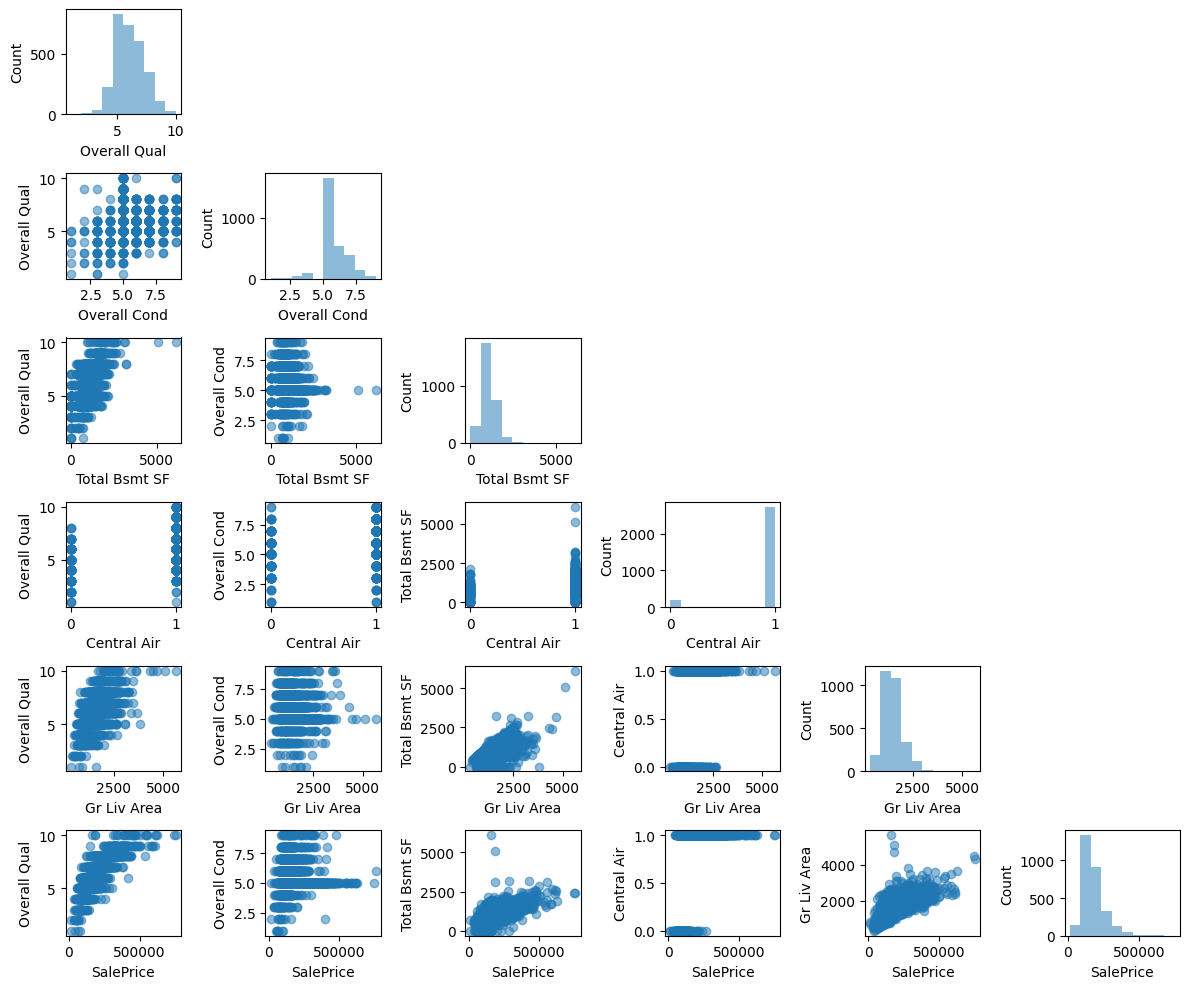

In [ ]:
# create a scatterplot matrix to visualize pair-wise correlations
# between different features
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df.values,
                  figsize=(12, 10),
                  names=df.columns,
                  alpha=0.5)

plt.tight_layout()
plt.show()

## Looking at relationships using a correlation matrix

The correlation matrix is a square matrix that contains the **Pearson product-momnet correlation coefficient** which measures the linear dependence between pairs of features. The correlation coefficients are in the range -1 to 1. Two features have a perfect postive correlation if r = 1, no correlation if r = 0, and a perfect negative correlation if r = -1.

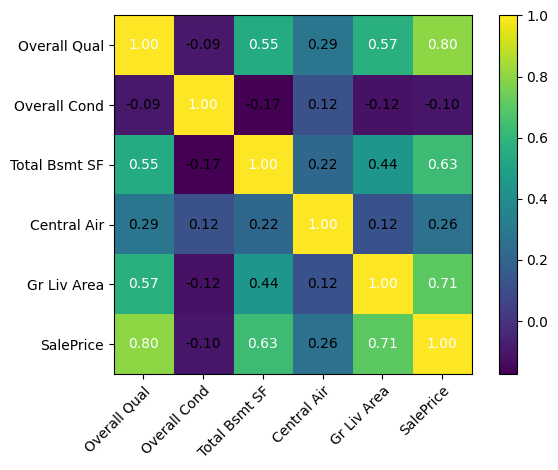

In [ ]:
# use NumPy's corrcoef function on five feature cols
# and mlxtend's heatmap function to plot correlation matrix
# as a heat map
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm,
             row_names=df.columns,
             column_names=df.columns)
plt.tight_layout()
plt.show()

# Implementing an ordinary least squares linear regression model

## Solving regression for regression parameters with gradient descent

In [ ]:
# remove threshold function from Adaline class
# to implement a linear regression model
class LinearRegressionGD:
  def __init__(self,
               eta=0.01,
               n_iter=50,
               random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0,
                          scale=0.01,
                          size=X.shape[1])
    self.b_ = np.array([0.])
    self.losses_ = []

    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (errors**2).mean()
      self.losses_.append(loss)

    return self

  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    return self.net_input(X)

In [ ]:
# extract and standardize col `Gr Liv Area` as training feature for this model
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() # 1D -> 2D -> transformed -> 1D

y[:5], y_std[:5]

(array([215000, 105000, 172000, 244000, 189900]),
 array([ 0.42783926, -0.94949293, -0.11057241,  0.79095411,  0.1135571 ]))

In [ ]:
y[:5]

array([215000, 105000, 172000, 244000, 189900])

In [ ]:
# turn label array y from 1D to 2D array as required for StandardScaler
sc_y.transform(y[:, np.newaxis])[:5]

array([[ 0.42783926],
       [-0.94949293],
       [-0.11057241],
       [ 0.79095411],
       [ 0.1135571 ]])

In [ ]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

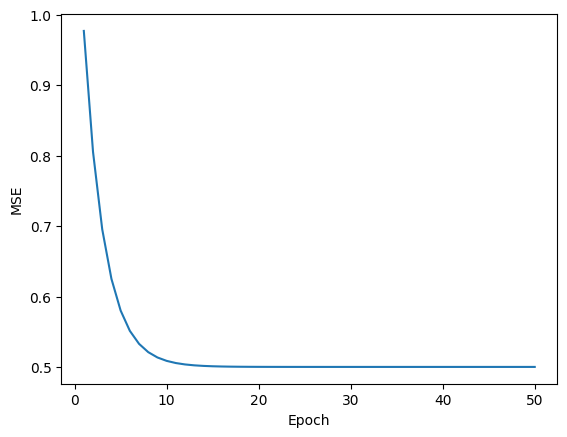

In [ ]:
# plt loss as a function of number of epochs (complete iterations)
# over training dataset when using algorithm such as GD
# to check that algorithm converged to a loss minimum (here a global loss min)
plt.plot(range(1, lr.n_iter+1),
         lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

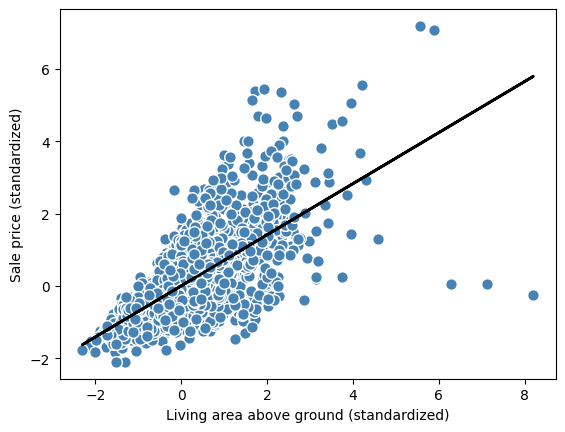

In [ ]:
# define a helper simple function to plot a scatteplot
# of training examples and add regression line
def lin_regplot(X, y, model):
  plt.scatter(X, y,
              c='steelblue',
              edgecolor='white',
              s=70)
  plt.plot(X,
           model.predict(X),
           color='black',
           lw=2)

lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

In [ ]:
# scale predicted price back onto original price in US dollars
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))

target_reverted.flatten()[0]

np.float64(292507.0674366433)

In [ ]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


## Estimating the coefficient of a regression model via scikit-learn

In [ ]:
# linear regression implementation in scikit-learn works
# better with unstandardized variables, since it doesn't use
# (S)GD based optimization so we can skip standardization
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slop: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

Slop: 111.666
Intercept: 13342.979


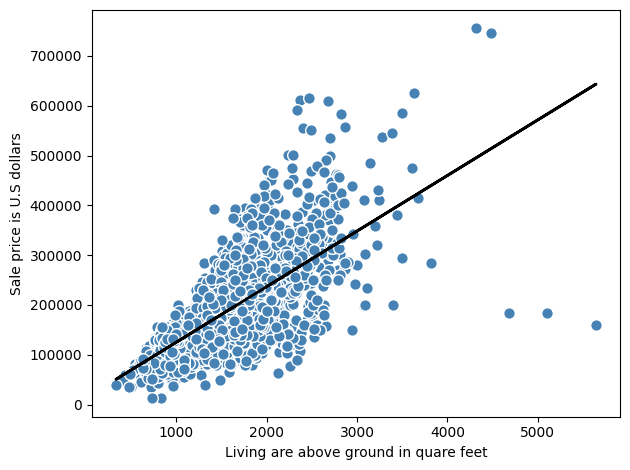

In [ ]:
# plot unstandardized data to compare
lin_regplot(X, y, slr)
plt.xlabel('Living are above ground in quare feet')
plt.ylabel('Sale price is U.S dollars')
plt.tight_layout()
plt.show()

**Analytical solutions of linear regression**

As an alternative to using machine learning libraries, there is also a closed-form solution for solving OLS involving a system of linear equations that can be found in most introductory statistics textbooks:

$ w = (X^TX)^-1X^Ty $

In [ ]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
Xb, Xb.shape

(array([[1.000e+00, 1.656e+03],
        [1.000e+00, 8.960e+02],
        [1.000e+00, 1.329e+03],
        ...,
        [1.000e+00, 9.700e+02],
        [1.000e+00, 1.389e+03],
        [1.000e+00, 2.000e+03]]),
 (2929, 2))

In [ ]:
w = np.zeros(X.shape[1])
w

array([0.])

In [ ]:
z = np.linalg.inv(np.dot(Xb.T, Xb))
z

array([[ 3.34857832e-03, -2.00491485e-06],
       [-2.00491485e-06,  1.33670208e-09]])

In [ ]:
w = np.dot(z, np.dot(Xb.T, y))
w

array([13342.97866236,   111.66625842])

In [ ]:
print(f'Slope: {w[1]:.3f}\n'
      f'Intercept: {w[0]:.3f}')

Slope: 111.666
Intercept: 13342.979


# Fitting a robust regression model using RANSAC

Linear regression models can be heavily impacted by the presence of outliers. However, removing outliers always requires judgement and expert domain knowledge.

As an alternative to throwing out outliers, we will look at a robust method of regression using the **RANdom SAmple Consensus (RANSAC)** algorithm, which fits a regression model to a subset of the data, the so-called **inliers**.

Summary:

1. Select a random number of examples to be inliers and fit the model.
2. test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
3. Refit the model using all inliers.
4. Estimate the error of the fitted model versus the inliers.
5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations was reached; go back to *step 1* otherwise.

In [ ]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(estimator=LinearRegression(),
                         max_trials=100, # default value
                         min_samples=0.95,
                         residual_threshold=None, # default value, using Median Absolute Deviation of target values y
                         random_state=123)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

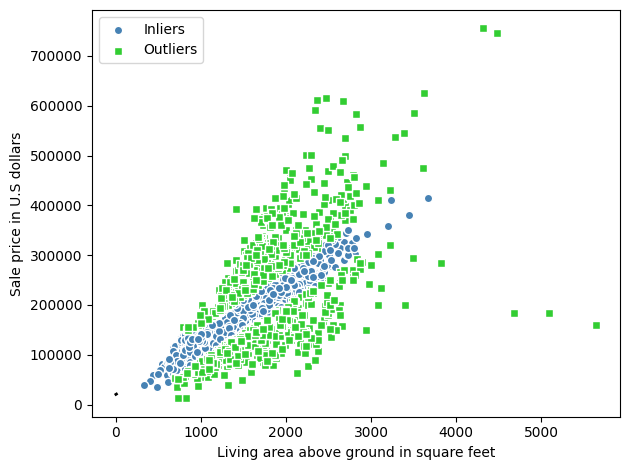

In [ ]:
# obtain inliers and outliers from fitted model
# and plot them with linear fit
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask],
            y[inlier_mask],
            c='steelblue',
            edgecolor='white',
            marker='o',
            label='Inliers')
plt.scatter(X[outlier_mask], y
            [outlier_mask],
            c='limegreen',
            edgecolor='white',
            marker='s',
            label='Outliers')
plt.plot(line_X,
         line_y_ransac,
         color='black',
         lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# compare slope and intercept of this RANSAC model
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}\n'
      f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.348
Intercept: 20190.093


In [ ]:
# compute MAD (mean absolute deviation) for this dataset
def mean_absolute_deviation(data):
  return np.mean(np.abs(data - np.mean(data)))

mean_absolute_deviation(y)

np.float64(58269.561754979375)

In [ ]:
# if we want to identify fewer data points as outliers,
# we can choose a `residual_threshold` value greater than above
ransac1 = RANSACRegressor(estimator=LinearRegression(),
                          max_trials=100,
                          min_samples=0.95,
                          residual_threshold=65000)
ransac1.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                residual_threshold=65000)

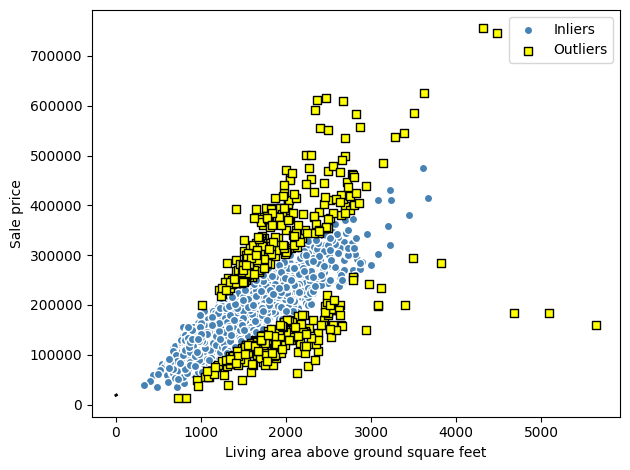

In [ ]:
inlier_mask = ransac1.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac1.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask],
            y[inlier_mask],
            c='steelblue',
            edgecolor='white',
            marker='o',
            label='Inliers')
plt.scatter(X[outlier_mask],
            y[outlier_mask],
            c='yellow',
            edgecolor='black',
            marker='s',
            label='Outliers')

plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground square feet')
plt.ylabel('Sale price')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print(f'Slope: {ransac1.estimator_.coef_[0]:.3f}\n'
      f'Intercept: {ransac1.estimator_.intercept_:.3f}')

Slope: 105.560
Intercept: 18309.849


# Evaluating the performance of linear regression models

In [ ]:
# use all five features in dataset to train multiple LR models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123)
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

**Residual plots** are a commonly used graphical tool for diagnosing regression models. They can help detect nonlinearity and outliers and check whether the errors are randomly distributed.

In [ ]:
x_max = np.max(
    [np.max(y_train_pred), np.max(y_test_pred)]
)
x_min = np.min(
    [np.min(y_train_pred), np.min(y_test_pred)]
)
x_max, x_min

(np.float64(726573.031019032), np.float64(-74500.41149265337))

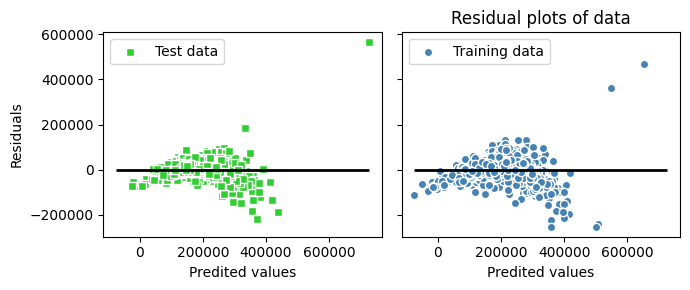

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(7, 3),
                               sharey=True)
plt.title('Residual plots of data')

ax1.scatter(y_test_pred,
            y_test_pred - y_test,
            c='limegreen',
            marker='s',
            edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred,
            y_train_pred - y_train,
            c='steelblue',
            marker='o',
            edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
  ax.set_xlabel('Predited values')
  ax.legend(loc='upper left')
  ax.hlines(y=0,
            xmin=x_min - 100,
            xmax=x_max + 100,
            color='black',
            lw=2)
plt.tight_layout()
plt.show()


In [ ]:
# MSE can be used for cross-validation and model selection
# MSE also normalizes according to sample size, n
# making it possible to compare across different sample sizes

# compute MSE out our training and test predictions
from sklearn.metrics import mean_squared_error as mse

mse_train = mse(y_true=y_train,
                y_pred=y_train_pred)
mse_test = mse(y_true=y_test,
               y_pred=y_test_pred)
print(f'MSE train: {mse_train:.2f} \n'
      f'MSE tests: {mse_test:.2f}')

MSE train: 1497216245.85 
MSE tests: 1516565821.00


In [ ]:
# compute MAE (mean absolute error)
from sklearn.metrics import mean_absolute_error as mae

mae_train = mae(y_true=y_train,
                y_pred=y_train_pred)
mae_test = mae(y_true=y_test,
               y_pred=y_test_pred)
print(f'MAE train: {mae_train:.2f}\n'
      f'MAE test: {mae_test:.2f}')

MAE train: 25983.03
MAE test: 24921.29


In [ ]:
# compute R^2
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.2f}, {test_r2:.2f}')

R^2 train: 0.77, 0.75


# Using regularized methods for regression

The most popular approaches to regularized linear regression are **ridge regression, least absulute shrinkage and selection operator (LASSO)**, and ** elastic net**.

Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to the MSE loss function:

$$
L(w)_\text{Ridge} = \sum_{i=1}^n \left(y^{(i)} - \hat{y}^{(i)} \right)^2 + \lambda\|w\|_2^2
$$

Here, the L2 term is defined as follows:

$$ \lambda\|w\|_2^2 = \lambda\sum_{j=1}^mw_j^2 $$

By increasing the value of hyperparameter $\lambda$, we can increase the regularization strength and thereby shrink the weights of our model. the bias unit *b* is not regularized.

An alternative approach that can lead to sparse models is LASSO. Depending on the regularization strength, certain weights can become zero, which also makes LASSO useful as a supervised feature selection technique:

$$
L(w)_\text{Lasso} = \sum_{i=1}^n \left(y^{(i)} - \hat{y}^{(i)}\right)^2 + \lambda\|w\|_1
$$

Here, the L1 penalty for LASSO is defined as the sum of the absolute magnitudes of the model weights, as follows:

$$
\lambda\|w\|_1 = \lambda\sum_{i=1}^m|w_j|
$$

However, a limitation of LASSO is that it selects at most *n* features if *m > n*, where *n* is the number of training examples. This may be undesirable in certain applications of feature selection. In practice, however, this property of LASSO is often an advantage because it avoids saturated models. The saturation of a model occurs if the number of training examples is equal to the number of features, which is a form of overparameterization. As a consequence, a saturated model can always fit traiing data perfectly but is merely a form of interpolation and thus is not expected to generalize well.

A compromise betweeen ridge regression and LASSO is **elastic net**, which has an L1 penalty to generate sparsity and an L2 penalty such that it can be used for selecting more than *n* features if *m > n*:

$$
L(w)_\text{Elastic Net} = \sum_{i=1}^n \left(y^{(i)} - \hat{y}^{(i)} \right)^2 + \lambda_2\|w\|_2^2 + \lambda_1\|w\|_1
$$

In [ ]:
# initialize a ridge regression model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0) # regularization strength
ridge

Ridge()

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)

In [ ]:
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=1.0,
                    l1_ratio=0.5)

# Tuning a linear regression model into a curve - polynomial regression

## Adding polynomial terms using scikit-learn

In [ ]:
# use PolynomialFeatures tranformer from scikit-learn
# to add a quadratic term (d=2) to a simple regression problem
# with one explanatory variable

# 1. a second-degree polynomial term
from sklearn.preprocessing import PolynomialFeatures

X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])

X

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

In [ ]:
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)

X_quad = quadratic.fit_transform(X)
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [ ]:
# 2. fit a simple linear regression model for comparison
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)


# 3. fit a multiple regression model on transformed features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

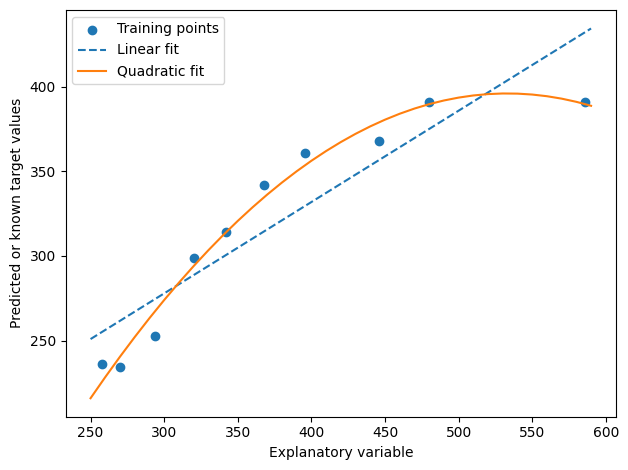

In [ ]:
# 4. plot results
plt.scatter(X, y, label='Training points')
plt.plot(X_fit,
         y_lin_fit,
         label='Linear fit',
         linestyle='--')
plt.plot(X_fit,
         y_quad_fit,
         label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# compute MSE and R^2 evaluation metrics
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
mse_lin = mse(y, y_lin_pred)
mse_quad = mse(y, y_quad_pred)

print(f'Training MSE linear: {mse_lin:.3f}'
      f', quadratic: {mse_quad:.3f}')

r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)

print(f'Traing R2 lin: {r2_lin:.3f}, quad: {r2_quad:.3f}')

Training MSE linear: 569.780, quadratic: 61.330
Traing R2 lin: 0.832, quad: 0.982


## Modeling nonlinear relationships in the Ames Housing dataset

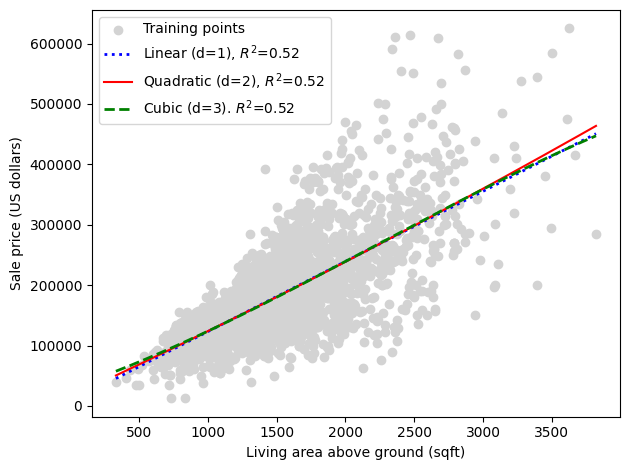

In [ ]:
# remove three outliers with living area greater than 4,000sqft
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

# fit regression model
regr = LinearRegression()

# create quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min() - 1,
                  X.max() + 2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_pred = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_pred = regr.predict(quadratic.fit_transform(X_fit))
quad_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_pred = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y,
            label='Training points',
            color='lightgray')
plt.plot(X_fit, y_lin_pred,
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue',
         lw=2,
         linestyle=':')
plt.plot(X_fit, y_quad_pred,
         label=f'Quadratic (d=2), $R^2$={quad_r2:.2f}',
         color='red',
         linestyle='-')
plt.plot(X_fit, y_cubic_pred,
         label=f'Cubic (d=3). $R^2$={cubic_r2:.2f}',
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('Living area above ground (sqft)')
plt.ylabel('Sale price (US dollars)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

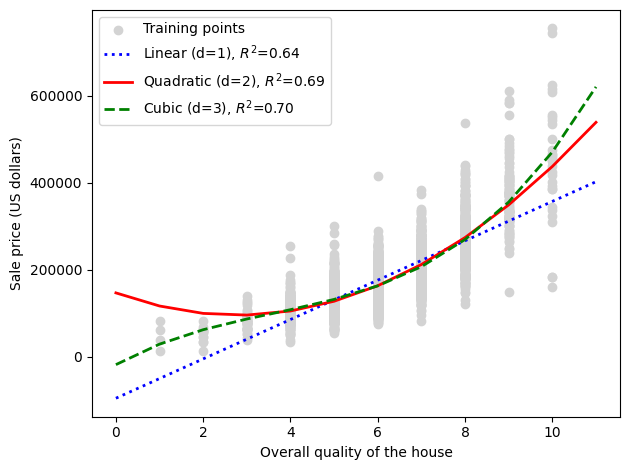

In [ ]:
# take a look at another feature, i.e Overal Qual
X = df[['Overall Qual']].values
y = df['SalePrice'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min() - 1,
                  X.max() + 2,
                  1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_pred = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_pred = regr.predict(quadratic.fit_transform(X_fit))
quad_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_pred = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y,
            label='Training points',
            color='lightgray')

plt.plot(X_fit,
         y_lin_pred,
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit,
         y_quad_pred,
         label=f'Quadratic (d=2), $R^2$={quad_r2:.2f}',
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit,
         y_cubic_pred,
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('Overall quality of the house')
plt.ylabel('Sale price (US dollars)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# Dealing with nonlinear relationships using random forests

## Decision tree regression

An advantage of the decision tree algorithm is that it works with arbitrary features and does not require any transformation of the features if we are dealing with nonlinear data because decision trees analuze one feature at a time, rather than taking weighted combinations into account.

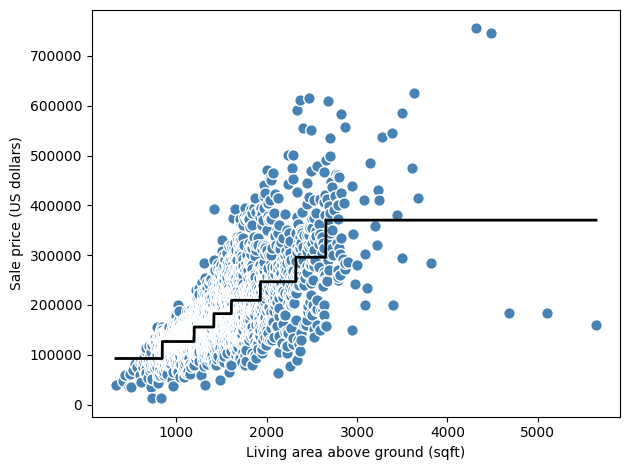

In [ ]:
# model relationship between SalePrice and Gr Liv Area variables
from sklearn.tree import DecisionTreeRegressor

X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx],
            y[sort_idx],
            tree)

plt.xlabel('Living area above ground (sqft)')
plt.ylabel('Sale price (US dollars)')
plt.tight_layout()
plt.show()

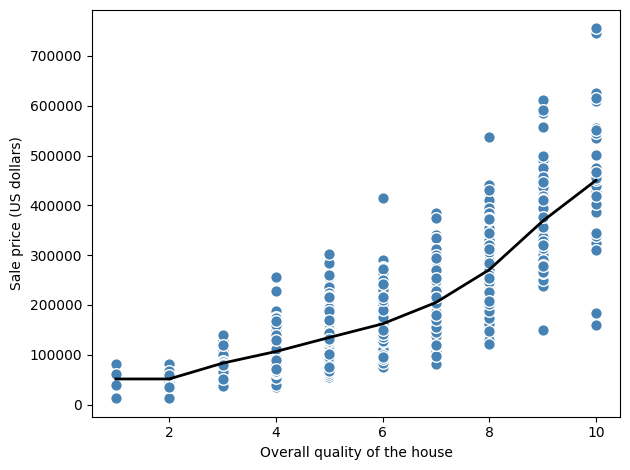

In [ ]:
# model Overall Qual and SalePrice
X = df[['Overall Qual']].values
y = df['SalePrice'].values

tree = DecisionTreeRegressor(max_depth=6)
tree.fit(X, y)

sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx],
            y[sort_idx],
            tree)

plt.xlabel('Overall quality of the house')
plt.ylabel('Sale price (US dollars)')
plt.tight_layout()
plt.show()

## Random forest regression

Random forest algorithm is an ensemble technique that combines multiple decision trees. A random forest usually has a better generalization performance than an individual decision tree due to randomness, which helps decrease the model's variance. Other advantages are that they are less sensitive to outliers in the dataset and don't require much parameter tuning. The only parameter in random forests that we typically need to experiment with is the number of of tree in the ensemble.

What's different between classification and regression is we use MSE criterion to grow the individual decision trees, and the predicted target variable is calculated as the average prediction across all decision trees.

In [ ]:
# use all features in Ames Housing dataset to fit a RFR model
# on 70 percent of examples and evaluate its performance
from sklearn.model_selection import train_test_split

target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f} |'
      f'MAE test: {mae_test:.2f}')

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f} |'
      f'R^2 test: {r2_test:.2f}')

MAE train: 8305.18 |MAE test: 20821.77
R^2 train: 0.98 |R^2 test: 0.85


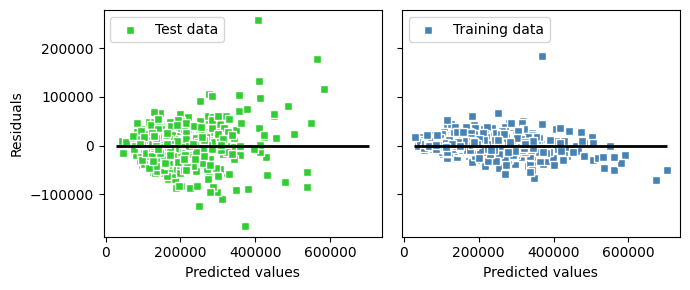

In [ ]:
# let's look at the residuals of prediction
x_max = np.max([np.max(y_train_pred), np.max((y_test_pred))])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(7, 3),
                               sharey=True)

ax1.scatter(y_test_pred,
            y_test_pred - y_test,
            c='limegreen',
            marker='s',
            edgecolor='white',
            label='Test data')

ax2.scatter(y_train_pred,
            y_train_pred - y_train,
            c='steelblue',
            marker='s',
            edgecolor='white',
            label='Training data')

ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
  ax.set_xlabel('Predicted values')
  ax.legend(loc='upper left')
  ax.hlines(y=0,
            xmin=x_min-100,
            xmax=x_max+100,
            color='black',
            lw=2)

plt.tight_layout()
plt.show()